In [140]:
import os
import sys

import pandas as pd
import numpy as np
import calendar
from datetime import datetime

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV

import shap

import warnings
warnings.filterwarnings("ignore")

os.chdir('/Users/jessicarapson/Documents/GitHub/crop-yield-estimate/')
sys.path.insert(0, '/Users/jessicarapson/Documents/GitHub/crop-yield-estimate/02-data-cleaning')

import cleaning
import feature_engineering
import scaling

train_path = "data/Train.csv"
df_train = cleaning.clean_data(train_path)
df_train = feature_engineering.get_features(df_train)
df_train = scaling.do_scaling(df_train)

test_path = "data/Test.csv"
df_test = cleaning.clean_data(test_path)
df_test = feature_engineering.get_features(df_test)
df_test = scaling.do_scaling(df_test)

### Build Generic Yield Model

Root Mean Squared Error: 854.8697981203388


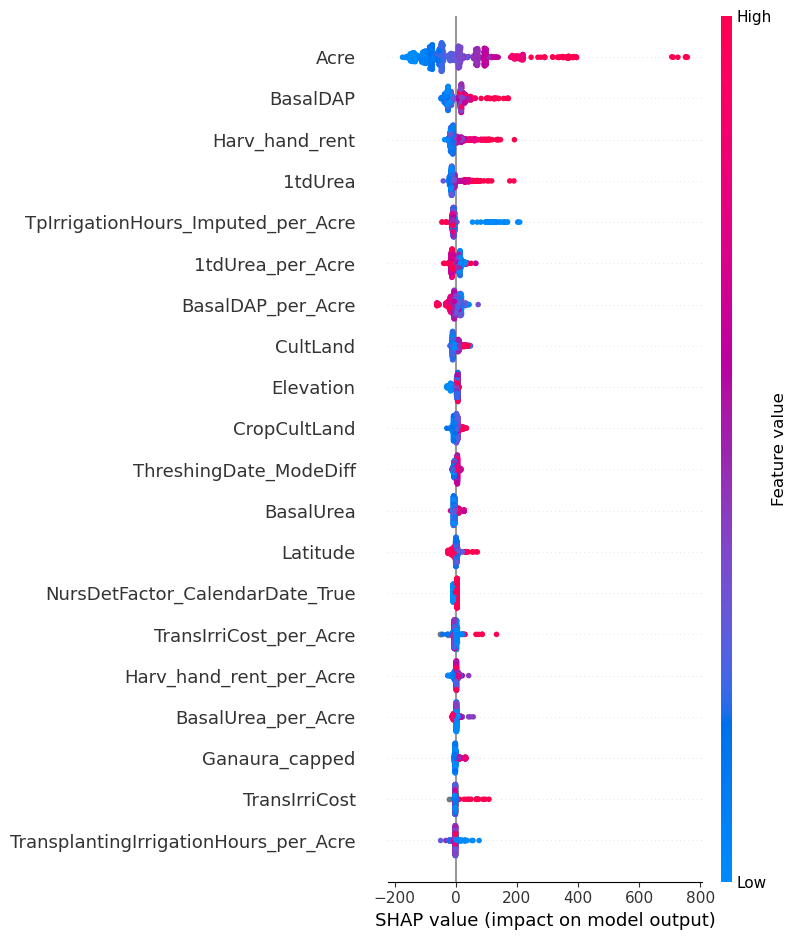

In [44]:
# Split data
X, y = df_train.drop(["Yield","Yield_per_Acre"], axis=1), df_train["Yield"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, alpha = 10,
                          n_estimators = 10)

# Train the XGBoost model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Create a TreeExplainer object with the XGBoost model
explainer = shap.TreeExplainer(xg_reg)

# Calculate Shapley values for a specific sample (replace index with your desired sample index)
sample_index = 0
shap_values = explainer.shap_values(X_test)

# Summary plot of Shapley values
shap.summary_plot(shap_values, X_test)

### Build Per Acre Only Yield Per Acre Model

Root Mean Squared Error: 864.4510452205583


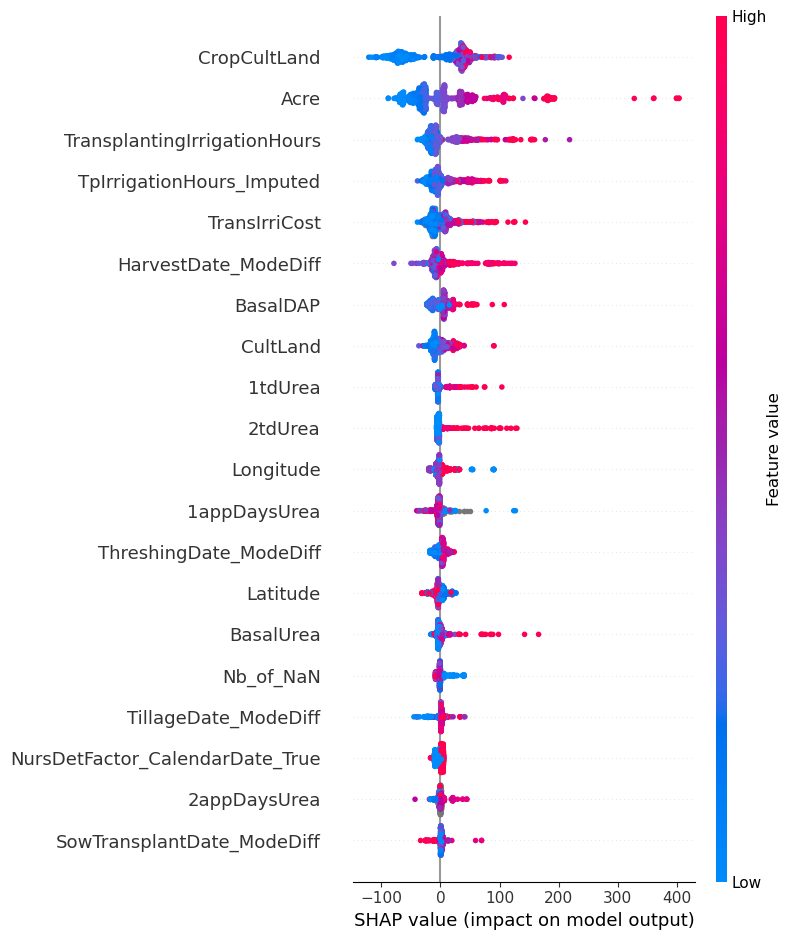

In [46]:
# Split data
X, y = df_train.drop(["Yield","Yield_per_Acre"], axis=1), df_train["Yield"]

# Drop columns that are not scaled by acre
X = X.drop(["TransplantingIrrigationHours_per_Acre","TpIrrigationHours_Imputed_per_Acre",
            "TransIrriCost_per_Acre","Ganaura_per_Acre","CropOrgFYM_per_Acre",
            "BasalDAP_per_Acre","BasalUrea_per_Acre","1tdUrea_per_Acre",
            "2tdUrea_per_Acre","Harv_hand_rent_per_Acre"], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, alpha = 10,
                          n_estimators = 10)

# Train the XGBoost model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Create a TreeExplainer object with the XGBoost model
explainer = shap.TreeExplainer(xg_reg)

# Calculate Shapley values for a specific sample (replace index with your desired sample index)
sample_index = 0
shap_values = explainer.shap_values(X_test)

# Summary plot of Shapley values
shap.summary_plot(shap_values, X_test)

### Build Yield Generic Yield Per Acre Model

Root Mean Squared Error: 1494.9228265906545


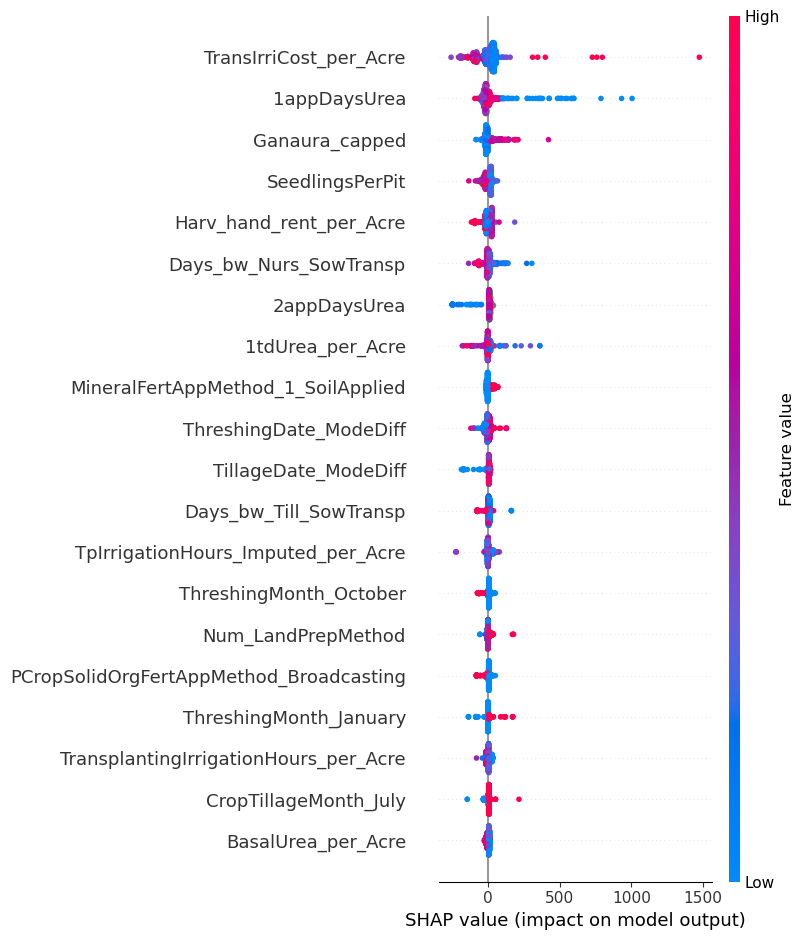

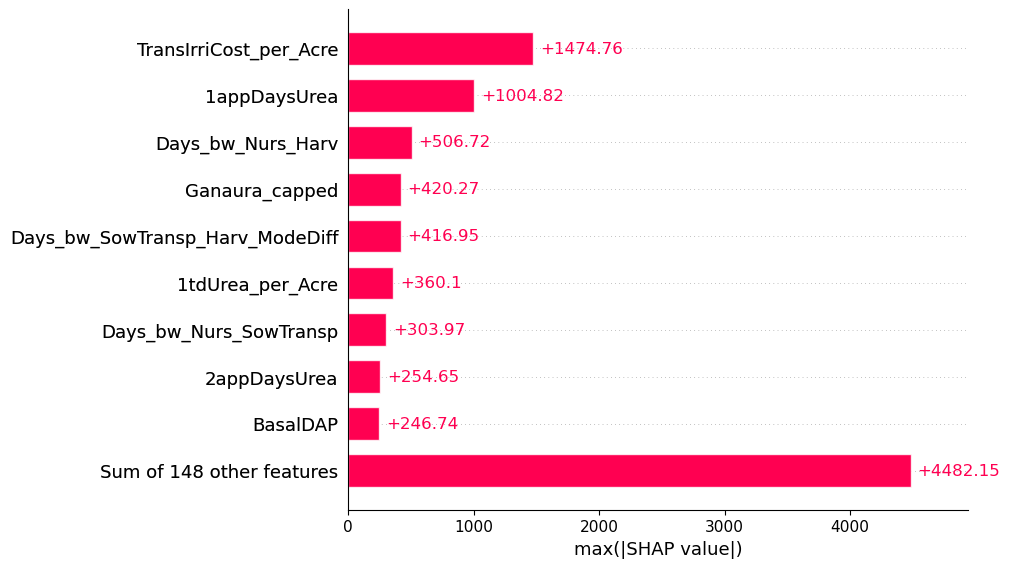

In [72]:
# Split data
X, y = df_train.drop(["Yield","Yield_per_Acre"], axis=1), df_train["Yield_per_Acre"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, alpha = 10,
                          n_estimators = 10)

# Train the XGBoost model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Create a TreeExplainer object with the XGBoost model
explainer = shap.TreeExplainer(xg_reg)

# Calculate Shapley values for a specific sample (replace index with your desired sample index)
sample_index = 0
shap_values = explainer.shap_values(X_test)

# Summary plot of Shapley values
shap.summary_plot(shap_values, X_test)
shap.plots.bar(explainer(X_test).abs.max(0))

### Build Per Acre Only Yield Per Acre Model

Root Mean Squared Error: 1545.849732377174


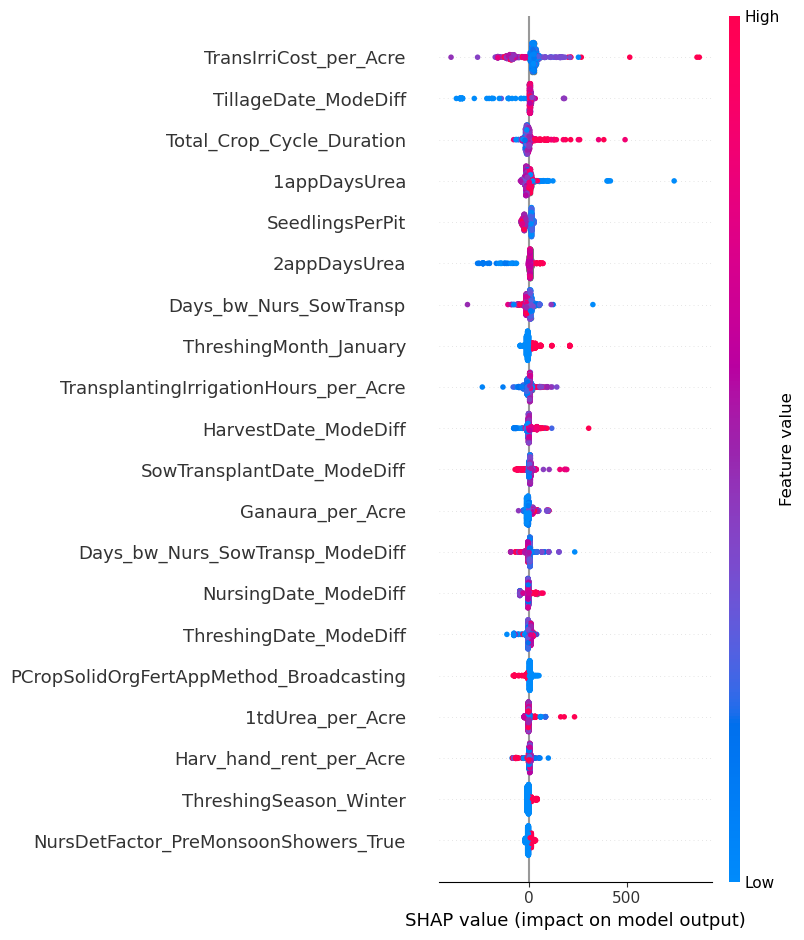

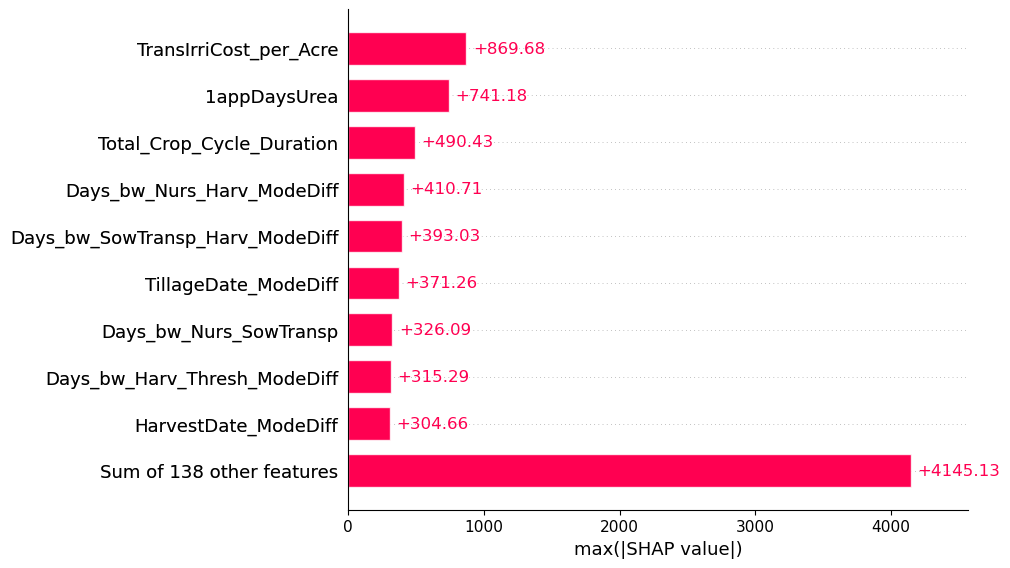

In [73]:
# Split data
X, y = df_train.drop(["Yield","Yield_per_Acre"], axis=1), df_train["Yield_per_Acre"]

# Drop columns that are not scaled by acre
X = X.drop(["TransplantingIrrigationHours","TpIrrigationHours_Imputed",
            "TransIrriCost","Ganaura","CropOrgFYM","BasalDAP","BasalUrea",
            "1tdUrea","2tdUrea","Harv_hand_rent"], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, alpha = 10,
                          n_estimators = 10)

# Train the XGBoost model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Create a TreeExplainer object with the XGBoost model
explainer = shap.TreeExplainer(xg_reg)

# Calculate Shapley values for a specific sample (replace index with your desired sample index)
sample_index = 0
shap_values = explainer.shap_values(X_test)

# Summary plot of Shapley values
shap.summary_plot(shap_values, X_test)
shap.plots.bar(explainer(X_test).abs.max(0))

### Build Block Specific Generic Yield Models

In [126]:
test = cleaning.clean_data(train_path)
test = feature_engineering.get_features(test)
test["Block"].value_counts()

Block
Rajgir        850
Jamui         626
Mahua         607
Khaira        500
Gurua         357
Noorsarai     343
Chehrakala    239
Wazirganj     213
Garoul        134
Gaya            1
Name: count, dtype: int64

Root Mean Squared Error: 307.41680690872187


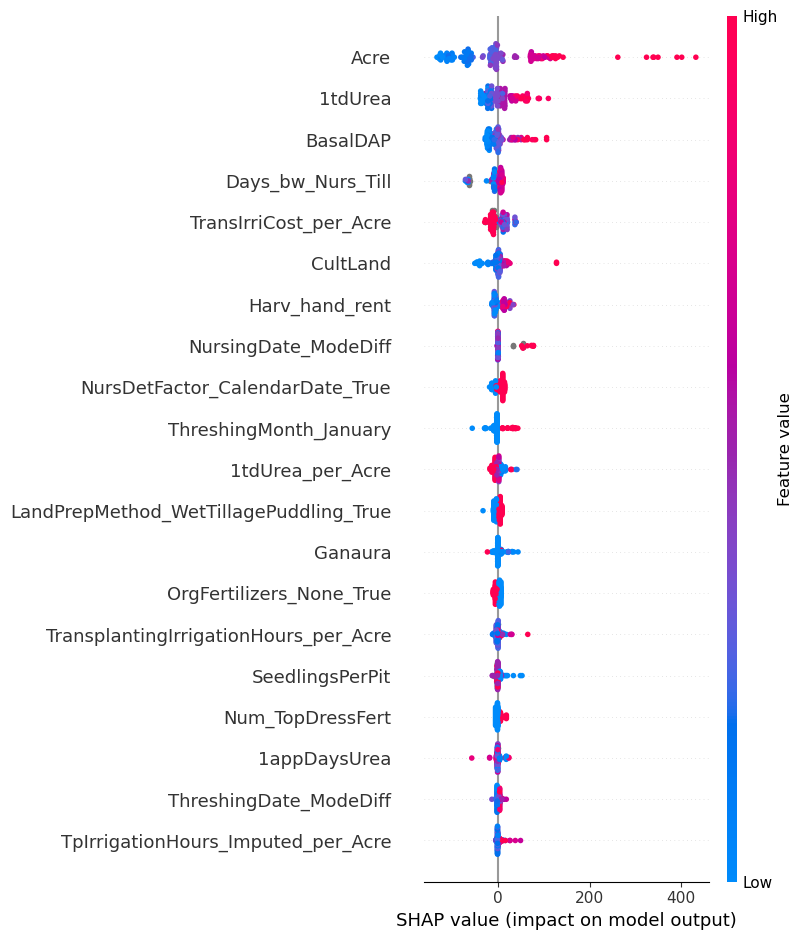

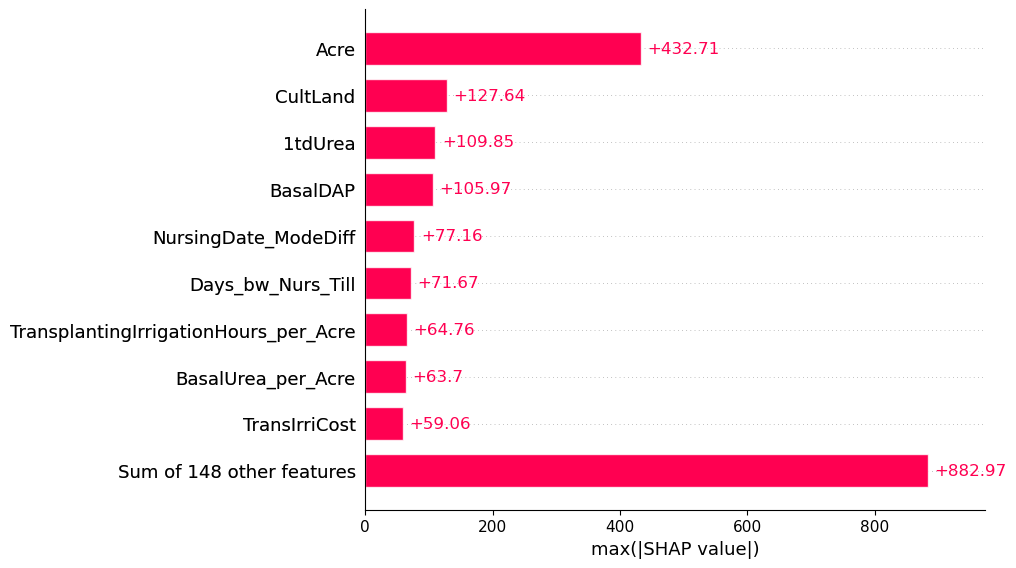

In [171]:
# Select block data
block = "Rajgir"
df_block = df_train[df_train["Block_" + block]]

# Split data
X, y = df_block.drop(["Yield","Yield_per_Acre"], axis=1), df_block["Yield"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,
                          learning_rate = 0.1, max_depth = 5, alpha = 10,
                          n_estimators = 10)

# Train the XGBoost model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Create a TreeExplainer object with the XGBoost model
explainer = shap.TreeExplainer(xg_reg)

# Calculate Shapley values for a specific sample (replace index with your desired sample index)
sample_index = 0
shap_values = explainer.shap_values(X_test)

# Summary plot of Shapley values
shap.summary_plot(shap_values, X_test)
shap.plots.bar(explainer(X_test).abs.max(0))

In [144]:
# Analyse errors
error_data = X_test
error_data["Yield"] = y_test
error_data["Predicted_Yield"] = y_pred
error_data["Error"] = error_data["Predicted_Yield"] - error_data["Yield"] 

error_data.sort_values(by='Error')

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,...,PCropSolidOrgFertAppMethod_Broadcasting,PCropSolidOrgFertAppMethod_RootApplication,PCropSolidOrgFertAppMethod_SoilApplied,PCropSolidOrgFertAppMethod_Spray,MineralFertAppMethod_2_Broadcasting,MineralFertAppMethod_2_RootApplication,MineralFertAppMethod_2_SoilApplied,Yield,Predicted_Yield,Error
3051,-0.674145,-0.597586,0.428571,0.047619,-0.163612,NaN,NaN,0.507593,-0.096314,0.333333,...,False,False,True,False,False,True,False,2500,433.417175,-2066.582825
3240,1.361961,1.617397,0.714286,0.047619,0.192366,0.052156,0.214286,-0.041337,-0.096314,0.333333,...,False,False,True,False,True,False,False,2500,1241.481079,-1258.518921
1940,12.856107,11.263291,0.285714,0.000000,0.726333,NaN,NaN,-0.145895,-0.096314,0.333333,...,False,False,False,False,True,False,False,2440,1261.814697,-1178.185303
1318,3.003982,3.403674,0.714286,0.047619,0.156768,0.296516,0.214286,-0.041337,-0.096314,0.333333,...,False,False,True,False,True,False,False,2300,1195.472656,-1104.527344
2747,-0.115858,0.009748,0.571429,0.047619,-0.092417,-0.558744,0.285714,-0.132825,-0.096314,0.333333,...,False,False,True,False,True,False,False,1530,683.150818,-846.849182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,-0.115858,0.009748,0.428571,0.000000,-0.234808,NaN,0.142857,-0.145895,-0.096314,0.333333,...,False,False,False,False,True,False,False,160,416.292877,256.292877
174,-0.608464,-0.526135,0.714286,NaN,-0.092417,-0.803104,0.214286,-0.145895,-0.096314,0.333333,...,False,False,False,False,True,False,False,80,342.351471,262.351471
207,-0.444262,-0.526135,0.714286,NaN,-0.092417,-0.803104,0.214286,-0.145895,-0.096314,0.333333,...,False,False,False,False,True,False,False,80,342.351471,262.351471
1078,-0.772666,-0.704762,0.571429,NaN,-0.234808,-0.803104,0.500000,-0.145895,-0.096314,0.333333,...,False,False,False,False,False,True,False,90,373.270203,283.270203


In [176]:
# Define the parameters grid for optimization
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],  # Learning rate values to test
    'max_depth': [3, 4, 5, 10]  # Max depth values to test
}

# Define K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Perform grid search
grid_result = grid_search.fit(X, y)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Get the best mean squared error score
best_score = grid_result.best_score_
print("Best Mean Squared Error:", -best_score)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 10}
Best Mean Squared Error: 126347.85499387507


In [204]:
# Define the number of folds for cross-validation
num_folds = 20

# Split data into two folds
fold_size = len(X) // num_folds
for i in range(num_folds):
    # Define the training and testing indices for this fold
    test_indices = list(range(i * fold_size, (i + 1) * fold_size))
    train_indices = [idx for idx in range(len(X)) if idx not in test_indices]

    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
# Train your model on the training set (for example, using XGBoost)e
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Calculate and print the evaluation metric (e.g., RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Fold {i+1} RMSE: {rmse}")

# This part is commented out since it requires a model and prediction implementation.
# You need to replace it with your actual model training, prediction, and evaluation code.

Fold 20 RMSE: 191.3903551619468


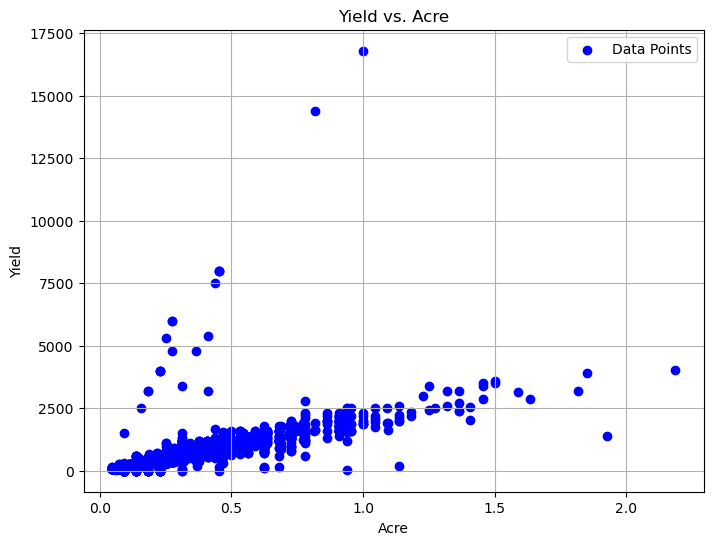

In [185]:
train = cleaning.clean_data(train_path)
train = feature_engineering.get_features(train)

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Optional: adjust figure size
plt.scatter(train['Acre'], train['Yield'], color='blue', label='Data Points')

# Add labels and title
plt.xlabel('Acre')  # Replace 'X Axis Label' with your label
plt.ylabel('Yield')  # Replace 'Y Axis Label' with your label
plt.title('Yield vs. Acre')  # Replace with your title

# Show legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: add grid
plt.show()

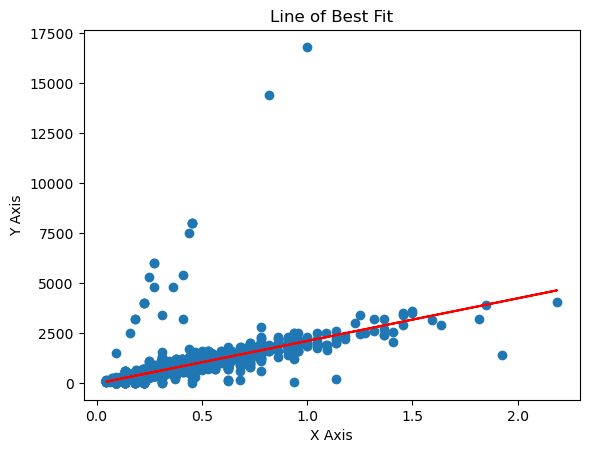

In [206]:
# Perform linear regression
slope, intercept = np.polyfit(train['Acre'], train['Yield'], 1)

# Plot data points
plt.scatter(train['Acre'], train['Yield'])

# Plot the line of best fit
plt.plot(train['Acre'], slope * train['Acre'] + intercept, color='red')  # y = mx + c

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line of Best Fit')
plt.show()

In [211]:
predicted_y = slope * train['Acre'] + intercept
residuals = train['Yield'] - predicted_y
train['Residuals'] = residuals
train['High Residual'] = train['Residuals'] >= 500

In [212]:
train[['Acre', 'Yield', 'Residuals']]

,Acre,Yield,Residuals
0,0.312500,600,-36.205003
1,0.312500,600,-36.205003
2,0.148148,225,-60.880374
3,0.222222,468,24.226836
4,0.468750,550,-419.260108
...,...,...,...
3865,0.375000,720,-49.427045
3866,0.136364,250,-10.761066
3867,0.375000,600,-169.427045
3868,0.227273,400,-54.538582


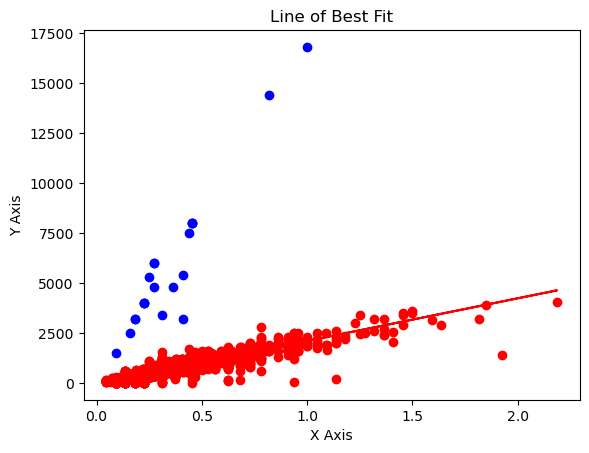

In [228]:
# Perform linear regression
slope, intercept = np.polyfit(train['Acre'], train['Yield'], 1)

# Plot data points with different colors based on 'Category'
cutoff = 1200
plt.scatter(train[train['Residuals']>=cutoff]['Acre'], train[train['Residuals']>=cutoff]['Yield'], color='blue')
plt.scatter(train[train['Residuals']<cutoff]['Acre'], train[train['Residuals']<cutoff]['Yield'], color='red')

# Plot the line of best fit
plt.plot(train['Acre'], slope * train['Acre'] + intercept, color='red')  # y = mx + c

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line of Best Fit')
plt.show()

In [230]:
train[train['Residuals']>=cutoff]

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Num_LandPrepMethod,Num_NursDetFactor,Num_TransDetFactor,Num_OrgFertilizers,Num_CropbasalFerts,Num_TopDressFert,Latitude,Longitude,Elevation,Residuals
28,ID_4MSB04KR90HL,Jamui,Jamui,10,10,WetTillagePuddling TractorPlough BullockPlough,2022-07-08,4,Manual_PuddledRandom,2022-07-06,...,3,3,1,1,2,1,24.919515,86.224718,89.048,3545.461418
422,ID_IBDSZU5RDVZG,Nalanda,Noorsarai,10,10,TractorPlough,2022-07-04,4,Manual_PuddledRandom,2022-06-16,...,1,1,3,0,1,1,25.274800,85.456900,63.000,2763.794997
521,ID_T2LOCPFM5WTE,Jamui,Jamui,20,15,TractorPlough WetTillagePuddling BullockPlough,2022-06-28,4,Manual_PuddledRandom,2022-07-15,...,3,3,1,1,2,1,24.919515,86.224718,89.048,5448.572660
764,ID_12YY9WCJI5WH,Jamui,Jamui,22,22,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-10,5,Manual_PuddledRandom,2022-07-01,...,3,3,1,1,2,1,24.919515,86.224718,89.048,14698.352534
842,ID_HSWMG2UG1PDM,Jamui,Jamui,20,20,WetTillagePuddling TractorPlough BullockPlough,2022-07-04,4,Manual_PuddledRandom,2022-07-15,...,3,3,1,1,2,1,24.919515,86.224718,89.048,7061.017629
909,ID_KCBT7VCA13K7,Jamui,Jamui,8,8,WetTillagePuddling TractorPlough BullockPlough,2022-07-07,4,Manual_PuddledRandom,2022-07-05,...,3,3,1,1,2,1,24.919515,86.224718,89.048,4034.795145
1101,ID_7EH77RYTRVOF,Jamui,Jamui,4,4,WetTillagePuddling TractorPlough BullockPlough,2022-06-28,2,Manual_PuddledRandom,2022-07-06,...,3,3,1,1,2,1,24.919515,86.224718,89.048,2842.350176
1140,ID_O69MKH6LL9T6,Jamui,Jamui,9,9,WetTillagePuddling TractorPlough BullockPlough,2022-06-30,4,Manual_PuddledRandom,2022-07-14,...,3,3,1,1,2,1,24.919515,86.224718,89.048,2357.906387
1618,ID_8HVG9OISAZS7,Nalanda,Rajgir,30,30,TractorPlough,2022-06-13,6,Manual_PuddledRandom,2022-06-16,...,1,1,5,0,3,1,25.026200,85.417400,67.000,4797.017039
1936,ID_QQ9YPPNOUCAX,Jamui,Jamui,25,24,WetTillagePuddling TractorPlough BullockPlough,2022-08-04,4,Manual_PuddledRandom,2022-07-02,...,3,3,1,1,2,1,24.919515,86.224718,89.048,12685.907566
